## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Default Model Performance:
Accuracy: 0.8132
Precision: 0.8367
Recall: 0.8200
F1 Score: 0.8283


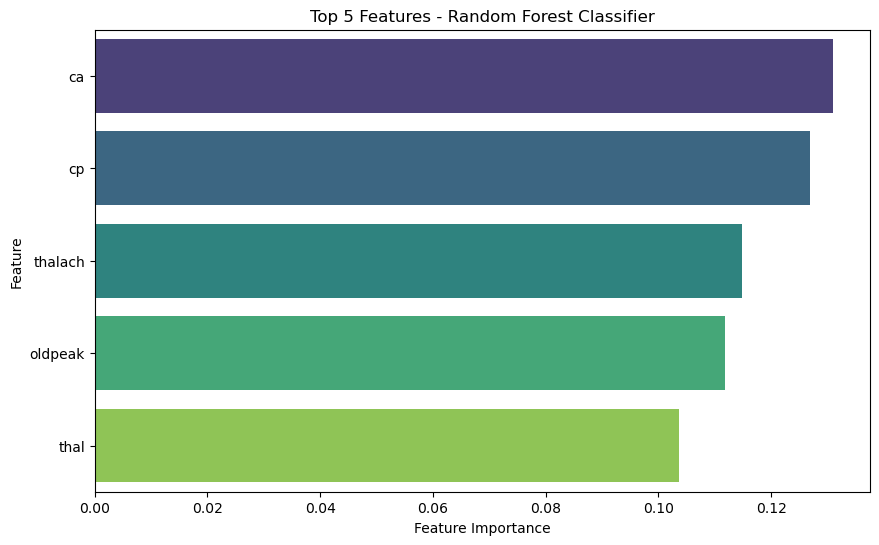


Tuned Model Performance:
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8352
Precision: 0.8302
Recall: 0.8800
F1 Score: 0.8544


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Separate features and target variable
target_column_name = 'target' 
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Step 2: Split the dataset into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a random forest classifier on the training set
rf_classifier_default = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier_default.fit(X_train, y_train)

# Step 4: Evaluate the performance of the model on the test set
y_pred_default = rf_classifier_default.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print("Default Model Performance:")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1 Score: {f1_default:.4f}")

# Step 5: Feature Importance
feature_importances = pd.Series(rf_classifier_default.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(5)

# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title('Top 5 Features - Random Forest Classifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Step 6: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 7: Report the best set of hyperparameters and corresponding performance metrics
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("\nTuned Model Performance:")
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")